# Analyze data

$p_1$ denotes the probability of measuring $XZX$, $p_2$ denotes the probability of applying a random symmetric three qubit Clifford, and $1-p_1-p_2$ is the probability of applying our channel. The data in the `data` folder comes from doing the following:

- Run the simulation to depth 100 (linear architecture). At each depth, compute the string order parameter. Do this 10 times. Average the string order parameters at each depth via the 10 samples. So this gives us a list of 100 values, where the $i^{\textrm{th}}$ value is an estimate of the average string order parameter expectation value at depth $i$.
- From this list, ignore the first 10 values, and average the rest of the list (i.e. the last 90 values). This gives us an estimate of the "long time" average string order parameter.
- Through this procedure, for each pair $(p_1, p_2)$, we get a number.

This is the data stored in the file in the `data` folder. In this notebook, we plot the results. We plot on a heat map, and we take slices of fixed $p_1$ and $p_2$.

Our original discussion on this analysis is in the following picture in `/graphics/mipt.jpeg`:

![](/graphics/mipt.jpeg)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from simulation import heatmap

### Read data

In [ ]:
num_qubits = range(50, 301, 50)

data = {nqubits: {} for nqubits in num_qubits}
for nqubits in num_qubits:
    with open(f"data/nqubits_{nqubits}.dat") as f:
        start = False
        for l in f:
            if "#" in l:
                start = True
            elif l and start:
                s = tuple(float(x.strip()) for x in l.split(","))
                p1, p2, string = s[0], s[1], s[2]
                data[nqubits][(p1, p2)] = string

### Plot heatmaps

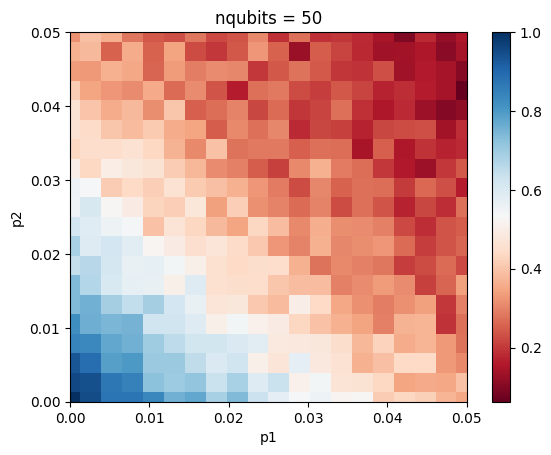

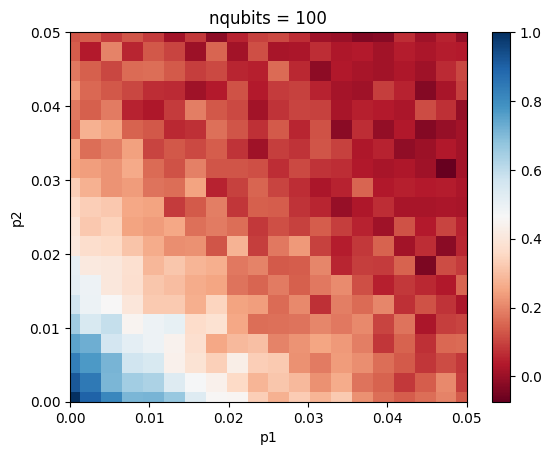

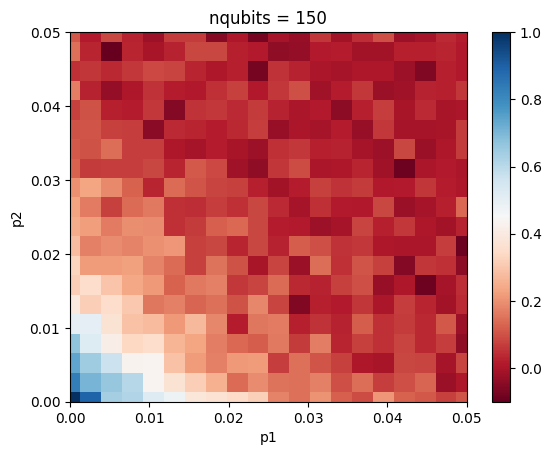

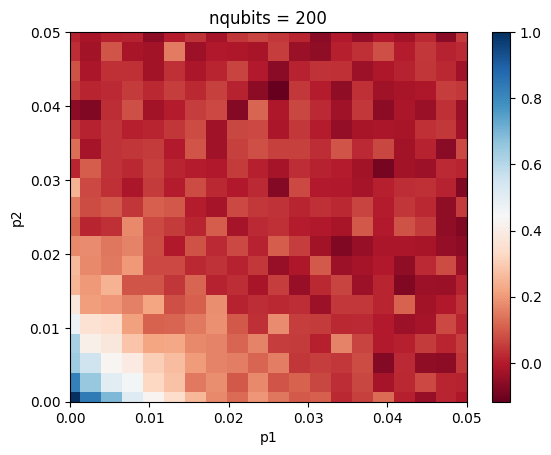

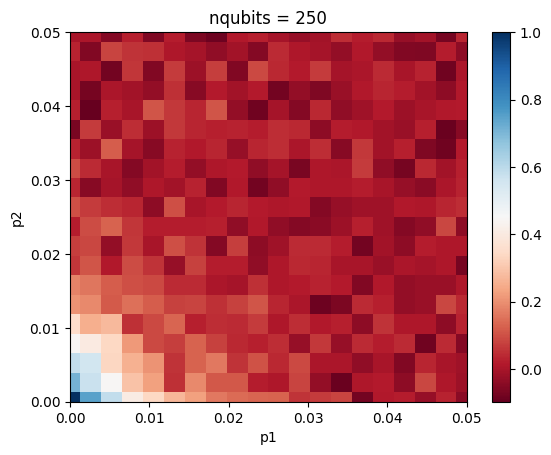

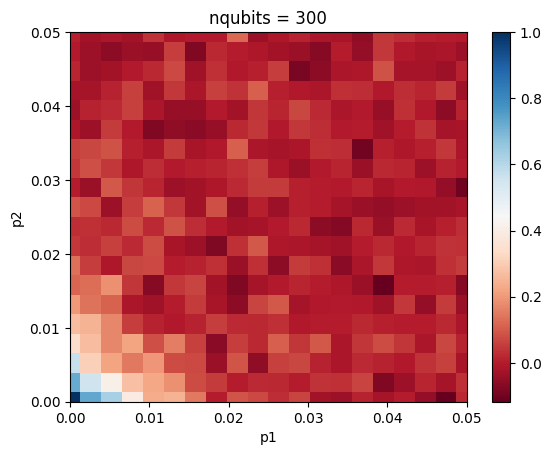

In [4]:
for nqubits in num_qubits:
    p1s = list(sorted({k[0] for k in data[nqubits]}))
    p2s = list(sorted({k[1] for k in data[nqubits]}))

    strings = np.zeros((len(p1s), len(p2s)))
    for r in range(len(p1s)):
        for c in range(len(p2s)):
            strings[r, c] = data[nqubits][(p1s[r], p2s[c])]
    heatmap(p1s, p2s, strings, "p1", "p2", f"nqubits = {nqubits}")

### Plot slices

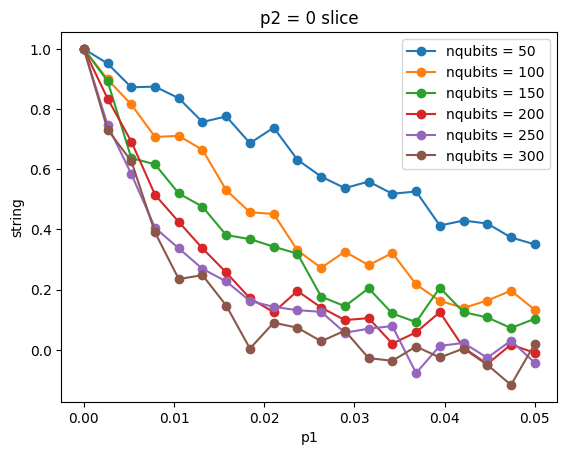

In [5]:
plt.figure()
for nqubits in num_qubits:
    xs = list(sorted({k[0] for k in data[nqubits]}))
    ys = [data[nqubits][(p1, 0)] for p1 in xs]
    plt.plot(xs, ys, "o-", label=f"nqubits = {nqubits}")
plt.title("p2 = 0 slice")
plt.xlabel("p1")
plt.ylabel("string")
plt.legend()
plt.show()

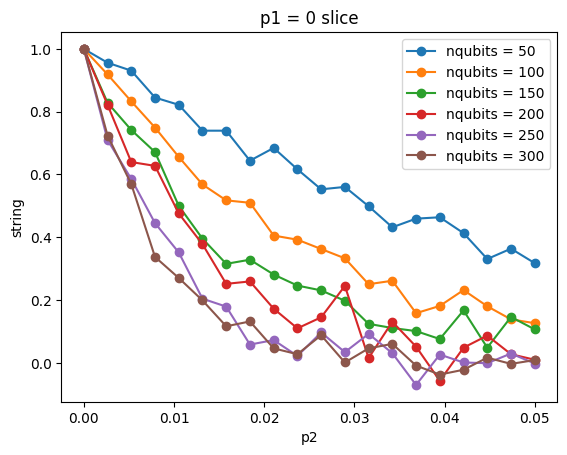

In [6]:
plt.figure()
for nqubits in num_qubits:
    xs = list(sorted({k[1] for k in data[nqubits]}))
    ys = [data[nqubits][(0, p2)] for p2 in xs]
    plt.plot(xs, ys, "o-", label=f"nqubits = {nqubits}")
plt.title("p1 = 0 slice")
plt.xlabel("p2")
plt.ylabel("string")
plt.legend()
plt.show()